In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lstsq

In [3]:
# Load data from .dat files
time = np.loadtxt("C:/Users/Nishith/Desktop/delay_60_40.dat")  # 50 time points
wavelengths = np.loadtxt("C:/Users/Nishith/Desktop/wl_60_40.dat")  # 100 wavelengths
EAS = np.loadtxt("C:/Users/Nishith/Desktop/TES_60_40.dat")  # EAS data, shape should be (50, 100)
concentrations = np.loadtxt("C:/Users/Nishith/Desktop/conc_prof_60_40_n.dat")  # Concentration profiles, shape should be (50, 3)

In [5]:
#concentrations

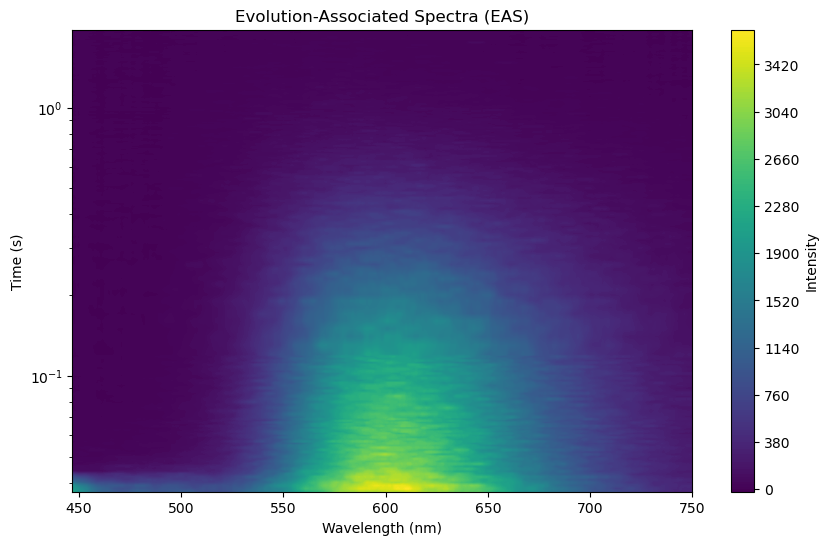

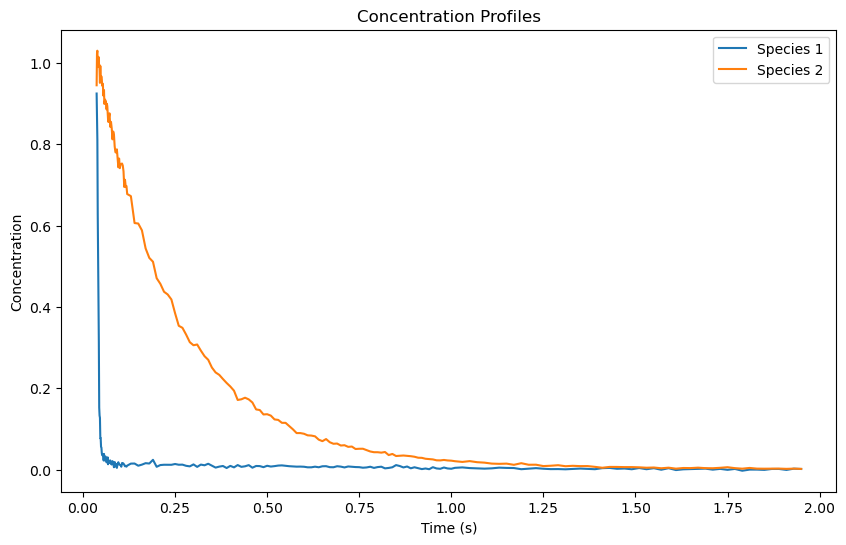

In [7]:
# Plot the EAS data
plt.figure(figsize=(10, 6))
plt.contourf(wavelengths, time, EAS, 207, cmap='viridis')
plt.colorbar(label='Intensity')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Time (s)')
plt.title('Evolution-Associated Spectra (EAS)')
plt.yscale('log')
plt.show()

# Plot the concentration profiles
plt.figure(figsize=(10, 6))
for i in range(concentrations.shape[1]):
    plt.plot(time, concentrations[:, i], label=f'Species {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('Concentration')
plt.title('Concentration Profiles')
plt.legend()
plt.show()


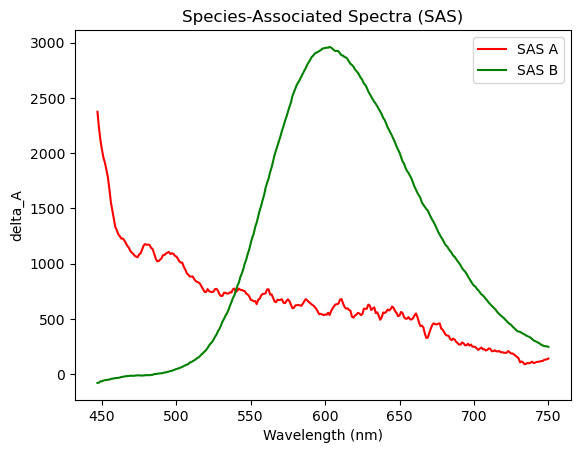

In [11]:
# Pre-allocate SAS matrix
num_species = concentrations.shape[1]
num_wavelengths = EAS.shape[1]
SAS = np.zeros((num_species, num_wavelengths))

# Solve for each wavelength
for i in range(num_wavelengths):
    # Form the matrix for the linear system at each wavelength
    concentration_matrix = concentrations
    EAS_vector = EAS[:, i]
    
    # Solve the linear system using least squares
    SAS[:, i], _, _, _ = lstsq(concentration_matrix, EAS_vector)

# SAS now contains the species-associated spectra
SAS_A = SAS[0, :]
SAS_B = SAS[1, :]
#SAS_C = SAS[2, :]
#SAS_D = SAS[3, :]
#SAS_E = SAS[4, :]

# Plot the SAS for visualization
plt.figure()
plt.plot(wavelengths, SAS_A, 'r', label='SAS A')
plt.plot(wavelengths, SAS_B, 'g', label='SAS B')
#plt.plot(wavelengths, SAS_C, 'b', label='SAS C')
#plt.plot(wavelengths, SAS_D, 'm', label='SAS D')
#plt.plot(wavelengths, SAS_E, 'c', label='SAS E')
plt.xlabel('Wavelength (nm)')
plt.ylabel('delta_A')
plt.legend()
plt.title('Species-Associated Spectra (SAS)')
plt.show()